# Learning Tree Structure from Data using the Chow-Liu Algorithm 

In this notebook, we show an example for learning the structure of a Bayesian Network using the Chow-Liu algorithm.  We will first build a model to generate some data and then attempt to learn the model's graph structure back from the generated data.

## First, create a tree graph

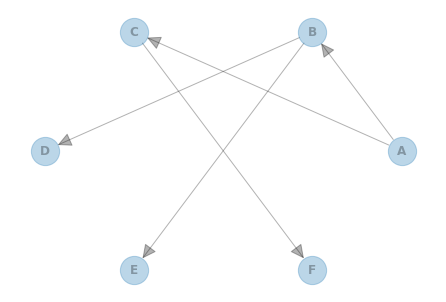

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from pgmpy.models import BayesianNetwork

# construct the tree graph structure
model = BayesianNetwork([("A", "B"), ("A", "C"), ("B", "D"), ("B", "E"), ("C", "F")])
nx.draw_circular(
    model, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight="bold"
)
plt.show()

## Then, add CPDs to our tree to create a Bayesian network

In [2]:
from pgmpy.factors.discrete import TabularCPD

# add CPD to each edge
cpd_a = TabularCPD("A", 2, [[0.4], [0.6]])
cpd_b = TabularCPD(
    "B", 3, [[0.6, 0.2], [0.3, 0.5], [0.1, 0.3]], evidence=["A"], evidence_card=[2]
)
cpd_c = TabularCPD("C", 2, [[0.3, 0.4], [0.7, 0.6]], evidence=["A"], evidence_card=[2])
cpd_d = TabularCPD(
    "D",
    3,
    [[0.5, 0.3, 0.1], [0.4, 0.4, 0.8], [0.1, 0.3, 0.1]],
    evidence=["B"],
    evidence_card=[3],
)
cpd_e = TabularCPD(
    "E", 2, [[0.3, 0.5, 0.2], [0.7, 0.5, 0.8]], evidence=["B"], evidence_card=[3]
)
cpd_f = TabularCPD(
    "F", 3, [[0.3, 0.6], [0.5, 0.2], [0.2, 0.2]], evidence=["C"], evidence_card=[2]
)
model.add_cpds(cpd_a, cpd_b, cpd_c, cpd_d, cpd_e, cpd_f)

## Next, generate sample data from our tree Bayesian network

In [3]:
from pgmpy.sampling import BayesianModelSampling

# sample data from BN
inference = BayesianModelSampling(model)
df_data = inference.forward_sample(size=10000)
print(df_data)

Generating for node: D: 100%|██████████| 6/6 [00:00<00:00, 275.41it/s]

      A  B  C  D  E  F
0     0  1  0  2  0  1
1     0  0  0  1  1  1
2     1  1  0  1  0  1
3     1  2  1  1  1  0
4     0  0  1  1  0  0
...  .. .. .. .. .. ..
9995  0  1  1  0  1  0
9996  0  0  1  1  1  0
9997  1  1  0  2  1  2
9998  1  0  0  0  1  0
9999  1  1  1  0  1  0

[10000 rows x 6 columns]


## Finally, apply the Chow-Liu algorithm to learn the tree graph from sample data

Building tree: 100%|██████████| 15/15.0 [00:00<00:00, 4518.10it/s]


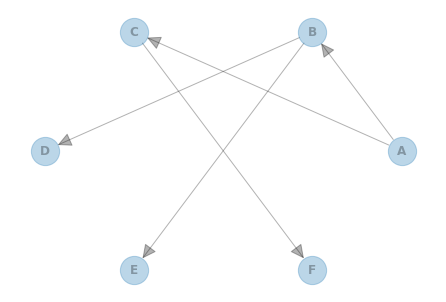

In [4]:
from pgmpy.estimators import TreeSearch

# learn graph structure
est = TreeSearch(df_data, root_node="A")
dag = est.estimate(estimator_type="chow-liu")
nx.draw_circular(
    dag, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight="bold"
)
plt.show()

## To parameterize the learned graph from data, check out the other tutorials for more info

In [5]:
from pgmpy.estimators import BayesianEstimator

# there are many choices of parametrization, here is one example
model = BayesianNetwork(dag.edges())
model.fit(
    df_data, estimator=BayesianEstimator, prior_type="dirichlet", pseudo_counts=0.1
)
model.get_cpds()

[<TabularCPD representing P(A:2) at 0x7f24dd4dbdf0>,
 <TabularCPD representing P(B:3 | A:2) at 0x7f24dd4d4ee0>,
 <TabularCPD representing P(C:2 | A:2) at 0x7f24dd4d7790>,
 <TabularCPD representing P(D:3 | B:3) at 0x7f24dd4d7ee0>,
 <TabularCPD representing P(E:2 | B:3) at 0x7f24dd4c7cd0>,
 <TabularCPD representing P(F:3 | C:2) at 0x7f24dd4d7c10>]